In [ ]:
import numpy as np
def DMD(data, r):
    """Dynamic Mode Decomposition (DMD) algorithm."""
    
    ## Build data matrices
    X1 = data[:, : -1]
    X2 = data[:, 1 :]
    ## Perform singular value decomposition on X1
    u, s, v = np.linalg.svd(X1, full_matrices = False)
    ## Compute the Koopman matrix
    A_tilde = u[:, : r].conj().T @ X2 @ v[: r, :].conj().T * np.reciprocal(s[: r])
    ## Perform eigenvalue decomposition on A_tilde
    Phi, Q = np.linalg.eig(A_tilde)
    ## Compute the coefficient matrix
    Psi = X2 @ v[: r, :].conj().T @ np.diag(np.reciprocal(s[: r])) @ Q
    A = Psi @ np.diag(Phi) @ np.linalg.pinv(Psi)
    
    return A_tilde, Phi, A

In [ ]:
import numpy as np
def DMD4cast(data, r, pred_step):
    N, T = data.shape
    _, _, A = DMD(data, r)
    mat = np.append(data, np.zeros((N, pred_step)), axis = 1)
    for s in range(pred_step):
        mat[:, T + s] = (A @ mat[:, T + s - 1]).real
    return mat[:, - pred_step :]

In [ ]:
X = np.zeros((2, 10))
X[0, :] = np.arange(1, 11)
X[1, :] = np.arange(2, 12)
pred_step = 2
r = 2
mat_hat = DMD4cast(X, r, pred_step)
print(mat_hat)

[[11. 12.]
 [12. 13.]]


In [ ]:
DMD(X, r)

(array([[ 1.14834045, -1.98893635],
        [ 0.01106365,  0.85165955]]),
 array([1.+2.76013984e-08j, 1.-2.76013984e-08j]),
 array([[-3.99680289e-15-6.72287913e-09j,  1.00000000e+00+9.27951420e-09j],
        [-1.00000000e+00-9.49286412e-09j,  2.00000000e+00+8.32420889e-09j]]))

# Implementation of DMD

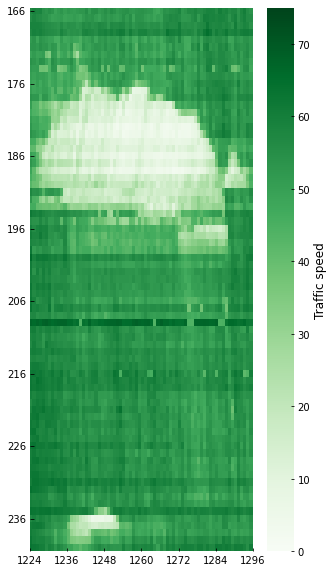

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
mat = np.load('toy_data.npy')
plt.style.use('bmh')
plt.rcParams['font.family'] = 'Arial'
fig = plt.figure(figsize = (5,10))
sns.heatmap(mat, cmap = 'Greens', cbar_kws={'label': 'Traffic speed'}, vmin = 0, vmax = 75)
plt.xticks(np.arange(0, 72 + 1, 12), np.arange(4 * 288 + 72, 4 * 288 + 144 + 1, 12), rotation = 0)
plt.yticks(np.arange(0.5, 75.5, 10), np.arange(166, 241, 10), rotation = 0)
plt.show()

In [ ]:
mat.shape

(75, 72)

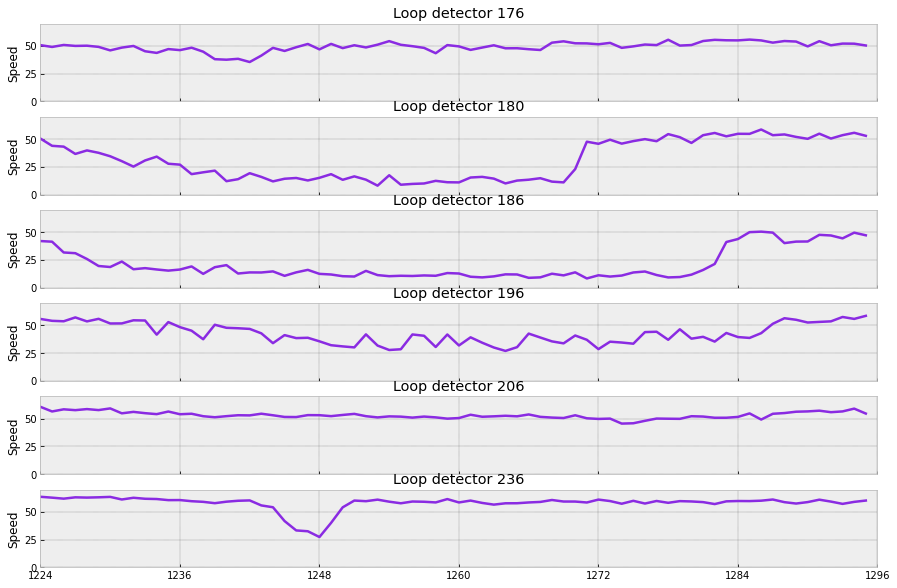

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15, 10))
i = 1
for loc in [175,179,185, 195,205,235]:
    ax = fig.add_subplot(6, 1, i)
    plt.plot(mat[loc - 166, :], color = 'blueviolet', linewidth = 2.5)
    plt.xticks(np.arange(0, 72 + 1, 12), 
               np.arange(4 * 288 + 72, 4 * 288 + 144 + 1, 12))
    if i != 6:
        plt.setp(ax.get_xticklabels(), visible = False)
    plt.grid(axis = 'both', linestyle = "--", linewidth = 0.2, color = 'black')
    plt.ylabel('Speed')
    plt.title('Loop detector {}'.format(loc + 1))
    ax.tick_params(direction = "in")
    ax.set_xlim([0, 72])
    ax.set_ylim([0, 70])
    i += 1
plt.show()

In [ ]:
import numpy as np
def DMD(data, r):
    """Dynamic Mode Decomposition (DMD) algorithm."""
    
    ## Build data matrices
    X1 = data[:, : -1]
    X2 = data[:, 1 :]
    ## Perform singular value decomposition on X1
    u, s, v = np.linalg.svd(X1, full_matrices = False)
    ## Compute the Koopman matrix
    A_tilde = u[:, : r].conj().T @ X2 @ v[: r, :].conj().T * np.reciprocal(s[: r])
    ## Perform eigenvalue decomposition on A_tilde
    eigval, eigvec = np.linalg.eig(A_tilde)
    ## Compute the coefficient matrix
    Psi = X2 @ v[: r, :].conj().T @ np.diag(np.reciprocal(s[: r])) @ eigvec
    
    return eigval, eigvec, Psi

In [ ]:
X1 = mat[:, : -1]

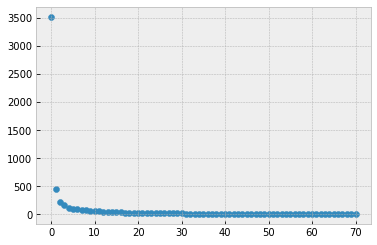

In [ ]:
u, s, v = np.linalg.svd(X1, full_matrices = False)
x = range(len(s))
y = s
plt.scatter(x, y)
plt.show()

In [ ]:
s,s.shape

(array([3.52100172e+03, 4.46130775e+02, 2.27198297e+02, 1.65620298e+02,
        1.21653293e+02, 1.03046986e+02, 9.43405726e+01, 8.74124042e+01,
        7.11115491e+01, 6.50656936e+01, 5.82440136e+01, 5.56111496e+01,
        5.02438755e+01, 4.22626565e+01, 4.15525370e+01, 3.82835659e+01,
        3.65335771e+01, 3.48746070e+01, 3.32152972e+01, 3.00616181e+01,
        2.88729197e+01, 2.83674035e+01, 2.71358305e+01, 2.58542170e+01,
        2.48322520e+01, 2.32237888e+01, 2.22993652e+01, 2.15620362e+01,
        1.98652843e+01, 1.85752004e+01, 1.80490842e+01, 1.69990980e+01,
        1.65844664e+01, 1.46000053e+01, 1.41924955e+01, 1.37290639e+01,
        1.30681620e+01, 1.29561771e+01, 1.20043990e+01, 1.18461104e+01,
        1.08842852e+01, 1.07615233e+01, 9.95296126e+00, 9.61018692e+00,
        9.25801555e+00, 8.77759819e+00, 8.55305230e+00, 8.21771036e+00,
        7.96132388e+00, 7.38309770e+00, 6.94842280e+00, 6.69811043e+00,
        6.22796837e+00, 6.03121210e+00, 5.77576494e+00, 5.342778

In [ ]:
mat

array([[56.8986619 , 58.8959509 , 58.19483019, ..., 60.16129916,
        55.90888391, 53.88660489],
       [55.81564682, 58.24519325, 56.32197232, ..., 59.30516431,
        56.01941302, 55.84452384],
       [58.8455151 , 58.80237505, 58.82281632, ..., 58.56058481,
        57.67324142, 53.94348769],
       ...,
       [60.55979056, 58.94029561, 57.79202113, ..., 50.28360695,
        49.71456305, 52.5998376 ],
       [62.35989069, 59.52328786, 58.54250688, ..., 56.0974711 ,
        54.97251497, 56.02796103],
       [63.33417667, 62.28483895, 61.58346825, ..., 58.62813363,
        55.03777337, 60.64719398]])

In [ ]:
import numpy as np
import pandas as pd
a = mat
a=pd.DataFrame(a)
a

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,56.898662,58.895951,58.194830,58.387931,54.479507,53.304796,54.834903,53.525802,49.456017,51.313030,...,57.834083,58.622254,55.715750,57.155343,57.171208,53.505023,57.735843,60.161299,55.908884,53.886605
1,55.815647,58.245193,56.321972,55.806065,54.112022,54.062361,51.781987,49.773365,50.146114,50.807194,...,58.586121,57.389985,53.351502,57.417117,59.369690,53.802713,57.152323,59.305164,56.019413,55.844524
2,58.845515,58.802375,58.822816,58.444441,56.864933,55.862860,55.552817,54.703695,54.021334,53.178603,...,56.272256,57.956982,56.053754,53.686780,60.433612,54.986519,56.060030,58.560585,57.673241,53.943488
3,57.344292,59.361716,58.580057,59.315399,57.959036,56.543827,56.111654,55.795289,55.323274,54.025317,...,59.098547,61.547962,57.953568,58.432078,59.510576,57.532918,59.921092,60.761049,60.686964,59.393924
4,51.617230,53.839011,48.832925,53.663069,52.258740,50.984415,49.561922,49.791035,46.129256,45.872198,...,53.157144,55.394337,48.298496,48.653030,54.199513,52.181721,50.770077,53.775768,54.178899,51.810892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,56.880161,59.259519,56.602383,59.072870,58.047899,56.146964,57.718220,53.438542,54.174615,55.357555,...,56.605494,55.858923,53.073016,51.622334,51.207800,57.107912,51.160669,49.667400,52.341504,55.424295
71,60.604612,61.433673,61.624035,61.434075,59.797996,56.150263,55.909744,53.305347,51.394616,52.601749,...,56.432388,56.033121,49.766103,50.983503,50.552046,53.263732,52.617661,51.313293,51.259491,54.376564
72,60.559791,58.940296,57.792021,56.505127,55.153140,52.739174,53.595620,51.028254,44.153912,50.684039,...,52.140340,50.707562,54.258131,49.619758,48.862076,51.813283,49.095156,50.283607,49.714563,52.599838
73,62.359891,59.523288,58.542507,58.656472,58.690502,56.401003,56.697975,53.992927,46.120756,51.753978,...,59.862497,57.487849,58.515399,53.289363,56.129814,56.951354,54.571661,56.097471,54.972515,56.027961


In [ ]:
X2 = mat[:, 1 :]
X2

array([[58.8959509 , 58.19483019, 58.38793139, ..., 60.16129916,
        55.90888391, 53.88660489],
       [58.24519325, 56.32197232, 55.80606481, ..., 59.30516431,
        56.01941302, 55.84452384],
       [58.80237505, 58.82281632, 58.44444094, ..., 58.56058481,
        57.67324142, 53.94348769],
       ...,
       [58.94029561, 57.79202113, 56.50512651, ..., 50.28360695,
        49.71456305, 52.5998376 ],
       [59.52328786, 58.54250688, 58.65647199, ..., 56.0974711 ,
        54.97251497, 56.02796103],
       [62.28483895, 61.58346825, 60.34754535, ..., 58.62813363,
        55.03777337, 60.64719398]])

In [ ]:
r = 50
eigval, eigvec, Psi = DMD(mat, r)

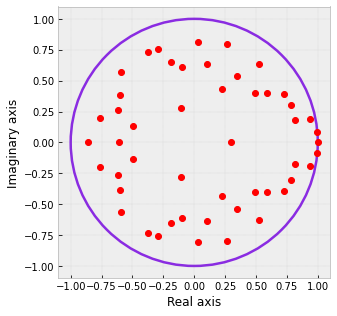

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect('equal', adjustable = 'box')
plt.plot(eigval.real, eigval.imag, 'o', color = 'red', markersize = 6)
circle = plt.Circle((0, 0), 1, color = 'blueviolet', linewidth = 2.5, fill = False)
ax.add_patch(circle)
plt.grid(axis = 'both', linestyle = "--", linewidth = 0.1, color = 'gray')
ax.tick_params(direction = "in")
plt.xlabel('Real axis')
plt.ylabel('Imaginary axis')
plt.show()

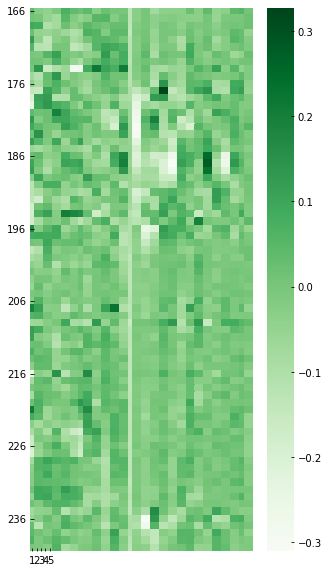

In [ ]:
fig = plt.figure(figsize = (5,10))
sns.heatmap(Psi.real,cmap = 'Greens',)
plt.xticks(np.arange(0.5, 5.5),np.arange(1, 6), rotation = 0)
plt.yticks(np.arange(0.5, 75.5, 10), np.arange(166, 241, 10), rotation = 0)
plt.show()

In [ ]:
def reconstruct_DMD_system(data, r):
    T = data.shape[1]
    ## Build data matrices
    X1 = data[:, : -1]
    X2 = data[:, 1 :]
    ## Perform singular value decomposition on X1
    u, s, v = np.linalg.svd(X1, full_matrices = False)
    ## Compute the Koopman matrix
    A_tilde = u[:, : r].conj().T @ X2 @ v[: r, :].conj().T * np.reciprocal(s[: r])
    ## Perform eigenvalue decomposition on A_tilde
    eigval, eigvec = np.linalg.eig(A_tilde)
    ## Compute the coefficient matrix
    Psi = X2 @ v[: r, :].conj().T @ np.diag(np.reciprocal(s[: r])) @ eigvec
    time_dynamics = np.zeros((r, T), dtype = 'complex')
    b = np.linalg.pinv(Psi) @ data[:, 0]
    for t in range(T):
        time_dynamics[:, t] = np.power(eigval, t + 1) * b
    return (Psi @ time_dynamics).real, time_dynamics.real

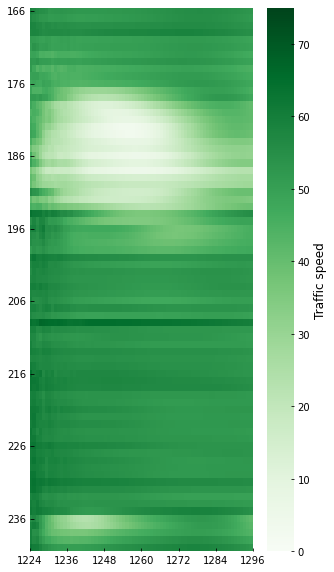

In [ ]:
r = 50
rec_system, time_dynamics = reconstruct_DMD_system(mat, r)

fig = plt.figure(figsize = (5,10))
sns.heatmap(rec_system, cmap = 'Greens', cbar_kws={'label': 'Traffic speed'}, vmin = 0, vmax = 75)
plt.xticks(np.arange(0, 72 + 1, 12), np.arange(4 * 288 + 72, 4 * 288 + 144 + 1, 12), rotation = 0)
plt.yticks(np.arange(0.5, 75.5, 10), np.arange(166, 241, 10), rotation = 0)
plt.show()

[-445.24152888 -444.68491961 -444.12900617 -443.5737877  -443.01926332
 -442.46543217 -441.91229338 -441.35984608 -440.80808942 -440.25702252
 -439.70664452 -439.15695457 -438.60795181 -438.05963536 -437.51200439
 -436.96505802 -436.4187954  -435.87321569 -435.32831802 -434.78410154
 -434.2405654  -433.69770875 -433.15553075 -432.61403053 -432.07320726
 -431.53306009 -430.99358817 -430.45479067 -429.91666672 -429.37921551
 -428.84243617 -428.30632788 -427.7708898  -427.23612108 -426.70202089
 -426.16858839 -425.63582275 -425.10372314 -424.57228873 -424.04151867
 -423.51141214 -422.98196832 -422.45318637 -421.92506546 -421.39760478
 -420.87080348 -420.34466076 -419.81917579 -419.29434773 -418.77017578
 -418.24665911 -417.72379691 -417.20158835 -416.68003262 -416.1591289
 -415.63887638 -415.11927424 -414.60032167 -414.08201785 -413.56436199
 -413.04735326 -412.53099086 -412.01527397 -411.5002018  -410.98577354
 -410.47198838 -409.95884551 -409.44634414 -408.93448347 -408.42326268
 -407.9

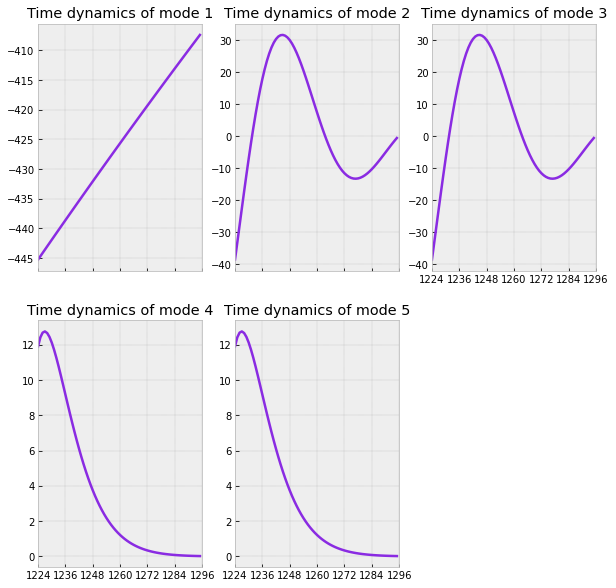

In [ ]:
fig = plt.figure(figsize = (10, 10))
for loc in range(1, 6):
    ax = fig.add_subplot(2, 3, loc)
    print(time_dynamics[loc - 1, :])
    plt.plot(time_dynamics[loc - 1, :], color = "blueviolet", linewidth = 2.5)
    plt.xticks(np.arange(0, 72 + 1, 12), 
               np.arange(4 * 288 + 72, 4 * 288 + 144 + 1, 12))
    if loc == 1 or loc == 2:
        plt.setp(ax.get_xticklabels(), visible = False)
    plt.grid(axis = 'both', linestyle = "--", linewidth = 0.2, color = 'gray')
    plt.title('Time dynamics of mode {}'.format(loc))
    ax.tick_params(direction = "in")
    ax.set_xlim([0, 72])
plt.show()

# prediction 

In [ ]:
X_dmd = Psi @ time_dynamics
predictions = np.real(X_dmd[:,70])

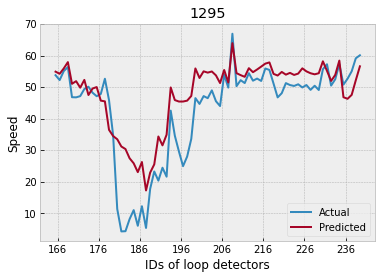

0.6590617698604531


In [ ]:
plt.plot(mat[:,50])
X_dmd = Psi @ time_dynamics
predictions = np.real(X_dmd[:,50])
plt.plot(predictions)
plt.xlabel("IDs of loop detectors")
plt.ylabel("Speed")
plt.xticks(np.arange(0.5, 75.5, 10), np.arange(166, 241, 10), rotation = 0)
plt.legend(["Actual", "Predicted"], loc ="lower right")
plt.title('1295')
plt.show()

from sklearn.metrics import r2_score
print(r2_score(mat[:,50],predictions))

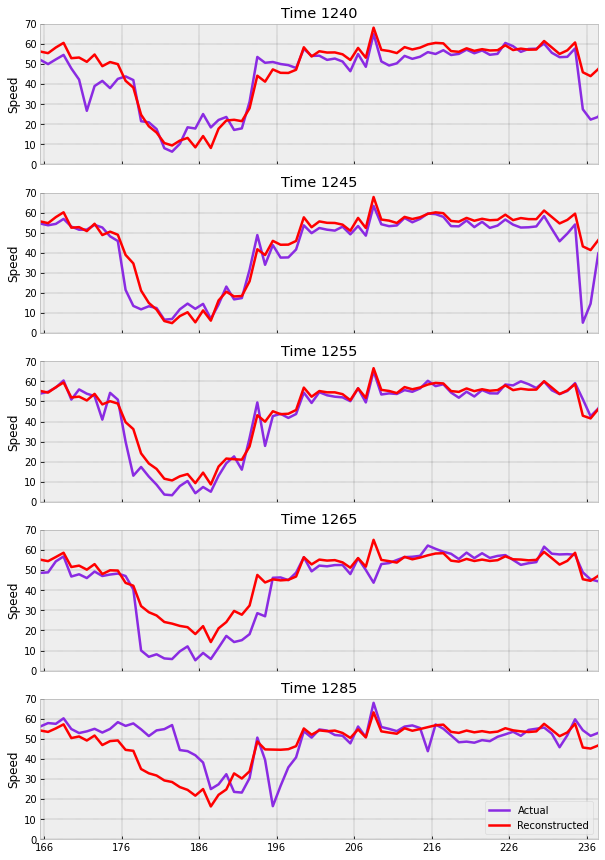

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 15))
i = 1
for loc in [15,20,30,40,60]:
    ax = fig.add_subplot(5, 1, i)
    plt.plot(mat[:,loc], color = 'blueviolet', linewidth = 2.5)
    plt.plot(np.real(X_dmd[:,loc]), color = 'red', linewidth = 2.5)
    plt.xticks(np.arange(0.5, 75.5, 10), np.arange(166, 241, 10), rotation = 0)
    if i != 5:
        plt.setp(ax.get_xticklabels(), visible = False)
    if i==5:
        plt.legend(["Actual", "Reconstructed"], loc ="lower right")
    plt.grid(axis = 'both', linestyle = "--", linewidth = 0.2, color = 'black')
    plt.ylabel('Speed')
    plt.title('Time {}'.format(loc + 1225))
    ax.tick_params(direction = "in")
    ax.set_xlim([0, 72])
    ax.set_ylim([0, 70])
    i += 1
plt.show()

In [ ]:
a[4].loc[:40]

0     54.479507
1     54.112022
2     56.864933
3     57.959036
4     52.258740
5     53.002956
6     50.718302
7     53.892336
8     38.452495
9     50.168426
10    50.361905
11    50.171606
12    52.824458
13    39.770974
14    41.577039
15    45.535094
16    45.438553
17    50.093039
18    38.942493
19    25.913237
20    18.564259
21    28.161683
22    21.389101
23    27.250060
24    28.754986
25    43.878819
26    29.347613
27    38.753986
28    57.896443
29    53.657397
30    58.848309
31    58.131244
32    55.714407
33    55.289285
34    61.888602
35    59.412393
36    60.012804
37    59.245610
38    60.298545
39    58.612559
40    57.112572
Name: 4, dtype: float64

In [ ]:
t=np.arange(1,10)
eigval=2
b=3
plt.plot(np.power(eigval, t + 1) *b )

In [ ]:
np.power(2,3)*4